<a href="https://colab.research.google.com/github/Claptar/play_around_find_out/blob/main/statistics/sample_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set the environment

## Import packages

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

sns.set_theme(style="white")

# Introduction

## Motivation
This notebook is inpired by two facts:

1. Sample variance for normaly distributed random variable $X$ is related to $\chi^2$ distribution in the following way:

\begin{equation}
\frac{\sum_{i=1}^n(X_i - \overline{X_n})^2}{\sigma^2} \sim \chi^2(n-1)\tag{1}
\end{equation}

2. It's easy to see that the sum in equation (1) is very similar to [quadratic form](https://en.wikipedia.org/wiki/Quadratic_form) and can be rewriten as such with matrix $H$.

    $$
    \sum_{i=1}^n(X_i - \overline{X_n})^2 = X^TAX, \tag{2}
    $$

    where $X=(X_1,X_2,...,X_n)^T$ and $A = I - \frac{1}{n}\mathbb{1}\mathbb{1}^T$.

These two facts motivated me to look closer at $\chi^2$ distribution (you can see more playing around with those [here](https://github.com/Claptar/play_around_find_out/blob/main/statistics/chi2_sum.ipynb)) and quadratic forms. So let's start with some relevant facts related to them.

## $\chi^2$ distribution

The $\chi^2$ (chi-squared) distribution is a continuous probability distribution that arises in statistics, most notably in hypothesis testing and confidence interval estimation. It is a special case of the Gamma distribution and is closely related to the Normal distribution.

If $Z_1, Z_2, \ldots, Z_k \sim \mathcal{N}(0,1)$ are $k$ independent standard normal random variables (with mean 0 and variance 1), then the sum of their squares is distributed according to the chi-squared distribution with $k$ degrees of freedom:

$$
\sum_{i=1}^k Z_i^2 \sim \chi^2(k) \tag{3}
$$

So degrees of freedom ($k$) represent the number of independent standard normal variables being summed

## Quadratic forms

A **quadratic form** on $\mathbb{R}^n$ is a homogeneous degree-2 polynomial that can be written
$$
Q(x)= \sum_{i=1}^na_{ij}x_ix_j = x^\top A\,x, \tag{4}
$$
where $x\in\mathbb{R}^n$ and $A\in\mathbb{R}^{n\times n}$ is **symmetric**.  

**Properties:**
1. If $x=Sy$ with $S$ invertible, then
$$
Q(x)=y^\top\,(S^\top A S)\,y. \tag{5}
$$

2. Any quadratic form can be brought to diagonal form (see [Sylvester's law of inertia](https://en.wikipedia.org/wiki/Sylvester%27s_law_of_inertia))
$$
Q(x) = a_{11}x_1^2 + a_{22}x_2^2 + ... + a_{nn}x_n^2 \tag{6}
$$
3. In linear inner dot space with gramm matrix $G$ each quadratic form $Q(x)$ has adjoint linear operator $f$ such that:
$$
Q(x) = <x,f(x)> \\
A = GF \tag{7}
$$

    where $A$ -- is a matrix of quadratic form and $B$ -- is a matrix of linear operator. For more details see [Lee](https://sites.math.washington.edu/~lee/Courses/443-2013/bilinear.pdf) or Linear Algebra and Geometry (Algebra, Logic and Applications) by Alexei I. Kostrikin, Yu. I. Manin.

# Let's play around

> ***Note1.*** From here on I will use the following notation. Big variables $X$ are used for random variables and matrices. Little variables $x$ are used to denote an abserved value of random variable $X$

Equations (1) and (3) suggest that can be represented as a sum of squares of $n-1$ normal distributions. Moreover we know from (6) that any quadratic form can be brought to a simple sum of squares. This means if we find a basis (or a matrix $S$) that will diagonalise our quadratic form $Q(\mathbf{x})$ and consist of orthogonal vectors we should see something like:

$$
Q(\mathbf{y}) = \sigma^2y^2_{1} + \sigma^2y^2_{2} + ... + \sigma^2y^2_{n-1} + 0\cdot y^2_{n}, \tag{8}
$$

where random variables $Y_1, Y_2, ..., Y_{n-1}$ must have standart normal distribution. This comes from equation (1).


> ***Note2.*** It's important to note that quadratic form $Q$ is defined for observations of random variables, which live in $\mathbb{R}^{n}$.

It is known that [self-adjoint linear operators](https://en.wikipedia.org/wiki/Self-adjoint_operator?utm_source=chatgpt.com) can be diagonalised with by selecting a basis of their spectral vectors. More over those vectors are orthogonal to each other (see [spectral theorem](https://en.wikipedia.org/wiki/Spectral_theorem?utm_source=chatgpt.com)). So here is what we can do:

1. Select Gramm's matrix to be $G=I$ for our initial basis so that a matrix of adjoint linear operator for our quadratic form $Q(x)$ equals $B = A$ (comes from equation (7))
2. Diagonalise the matrix of linear operator with the help of spectral theorem

    $$
    D = P^TBP = P^TAP,
    $$
    where $D$ is a diagonal matrix and $P$ is an orthonormal matrix that is constructed from eigen vectors
3. Use $y=P^Tx$ to get a basis in which $Q$ will take cannonical form (8)

Okay, that's it for the plan. Let's generate samples from normal distribution to visualise this approach.

In [2]:
# Generate random sample from normal distribution
n = 5 # random sample size
samples = 10000 # number of samples of size n
mu = 1 # mean of normal distribution
sigma = 2 # standart deviation of normal distribution

X = np.random.normal(loc=mu, scale=sigma, size=(n, samples))

Let's visualise $X_1$, ... $X_n$ to make sure that they are normally distributed

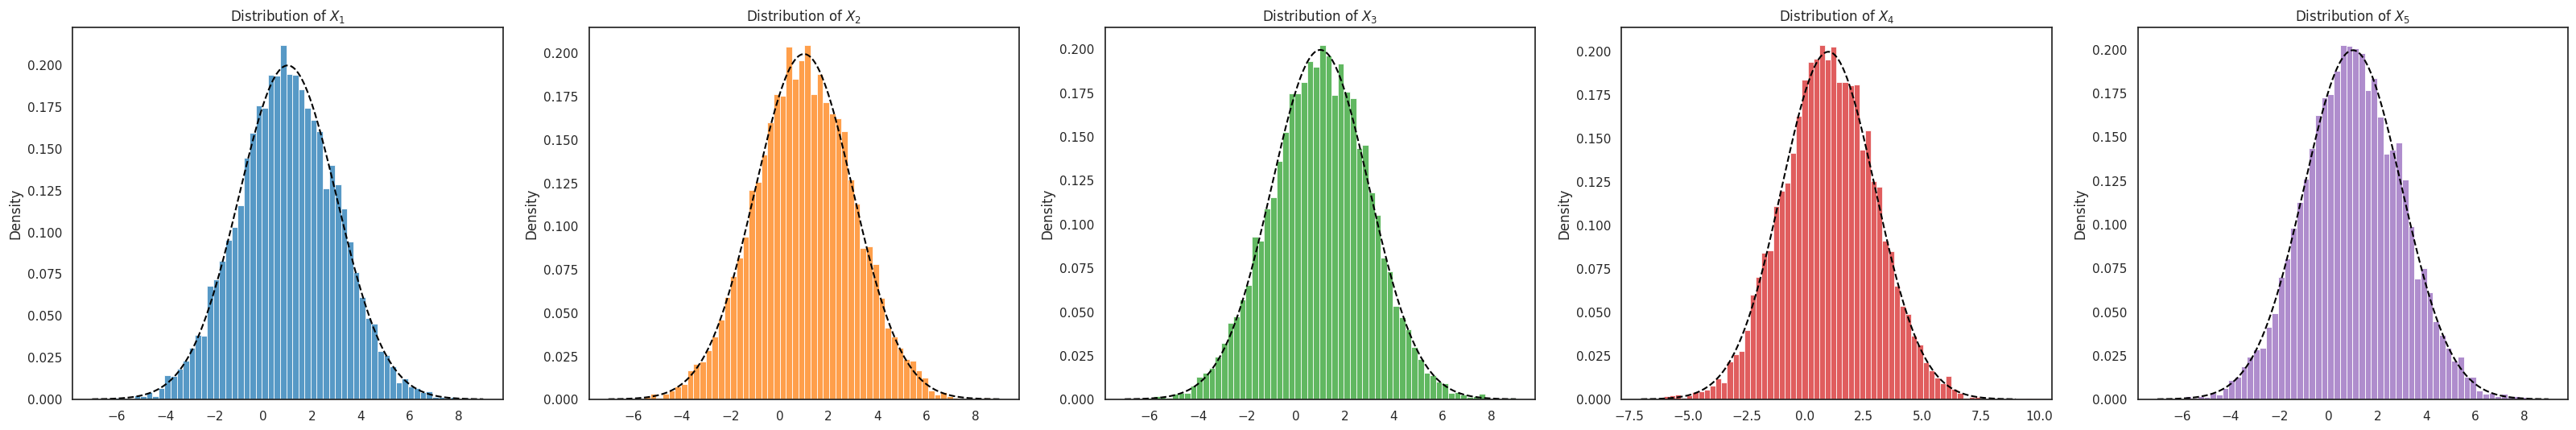

In [3]:
fig, axes = plt.subplots(1, n, figsize=(40, 6), gridspec_kw={'wspace': 0.2})

# Get colors for histograms
colors = plt.get_cmap('tab10').colors

# Calculate pdf for normal distribution
t_norm = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
normal_dist = sp.stats.norm.pdf(t_norm, mu, sigma)

for i in range(X.shape[0]):
    ax = axes.flatten()[i]
    # plot a histogram for X_i
    sns.histplot(X[i, :], stat='density', ax=ax, color=colors[i % 10])
    # plot pdf for normal distribution
    ax.plot(t_norm, normal_dist, linestyle='--', color='black')
    # add title
    ax.set_title(f'Distribution of $X_{i+1}$')

plt.show()

Perfect, we see that each $X_i$ truly has normal distribution. Now let's construct a matrix for sample distribution quadratic form from equation (8):
$$
A = I - \frac{1}{n}\mathbb{1}\mathbb{1}^T
$$

In [4]:
A = np.eye(n) - np.ones((n, n)) / n
print("Matrix A:")
print(tabulate(A, tablefmt="fancy_grid", floatfmt=".2f"))

Matrix A:
╒═══════╤═══════╤═══════╤═══════╤═══════╕
│  0.80 │ -0.20 │ -0.20 │ -0.20 │ -0.20 │
├───────┼───────┼───────┼───────┼───────┤
│ -0.20 │  0.80 │ -0.20 │ -0.20 │ -0.20 │
├───────┼───────┼───────┼───────┼───────┤
│ -0.20 │ -0.20 │  0.80 │ -0.20 │ -0.20 │
├───────┼───────┼───────┼───────┼───────┤
│ -0.20 │ -0.20 │ -0.20 │  0.80 │ -0.20 │
├───────┼───────┼───────┼───────┼───────┤
│ -0.20 │ -0.20 │ -0.20 │ -0.20 │  0.80 │
╘═══════╧═══════╧═══════╧═══════╧═══════╛


Now let's calculate eigen values and eigen vectors for adjoint linear operator with matrix $A$

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(A)

print("Eigenvalues:")
print(np.array2string(eigenvalues, precision=2, suppress_small=True))
print("\nEigenvectors:")
eigen_df = pd.DataFrame(eigenvectors, columns=[f'Y{i}' for i in range(1, n+1)])
eigen_df.round(3)

Eigenvalues:
[-0.  1.  1.  1.  1.]

Eigenvectors:


,Y1,Y2,Y3,Y4,Y5
0,0.447,-0.894,0.000,0.000,0.000
1,0.447,0.224,0.866,0.000,-0.000
2,0.447,0.224,-0.289,-0.577,-0.577
3,0.447,0.224,-0.289,0.789,-0.211
4,0.447,0.224,-0.289,-0.211,0.789


Let's analyse what have here. First of all we see that adjoint linear operator with matrix $A$ has $n-1$ eigen vectors with value $1$ and one eigen vector with value $0$. This means that cannonical form of our quadratic form is just as we expected it in (8).

Secondly, we understand linear operator associated with matrix $A$ is a proector. This comes from the fact that matrix $\mathbb{rang}(A)=n-1$ (as we can see from eigen values). Moreover it proects vectors on hyperplain orthogonal to eigenvector with value $0$. As you can see this vector is a vector of $\frac{1}{\sqrt{n}}[1, 1, ..., 1]$ ones. Which means that this operator basically proects all vectors to hyperplain of $\{x: \sum_{i=1}^nx_i = 0\}$.

Finally, if we take a transposed matrix of eigenvectors and apply it to our sample vectors $X$, we should be getting normally distributed variables with mean $0$ and variance $\sigma^2$ for components where eigen value equals 1 and a normally distributed random variable with mean $\mu \sqrt{n}$ and variance $\sigma^2$ (basically a distribution of $\frac{1}{\sqrt{n}}\sum_{i=1}^nX_i)$ for component where eigen value equals $0$. Let's check this.

In [6]:
# Apply matrix of eigen vectors
Y = eigenvectors.T @ X
Y.shape

(5, 10000)

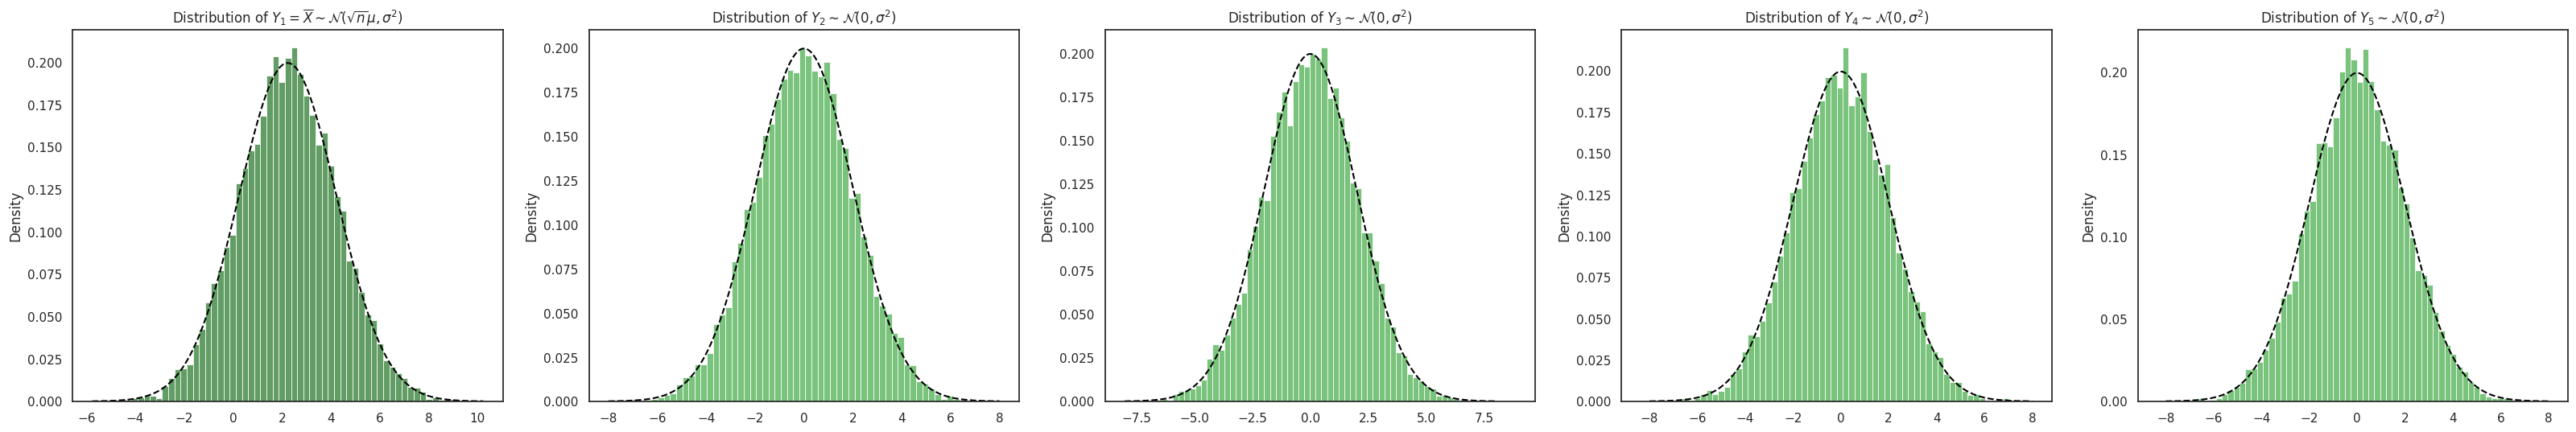

In [7]:
fig, axes = plt.subplots(1, n, figsize=(40, 6), gridspec_kw={'wspace': 0.2})

# Calculate pdf for normal distribution with mean 0 and variance sigma^2
t_norm = np.linspace(-4 * sigma, 4 * sigma, 1000)
normal_dist = sp.stats.norm.pdf(t_norm, 0, sigma)

# Calculate pdf for normal distribution with mean mu and variance sigma^2 / n
mean = mu * np.sqrt(n)
t_norm_sum = np.linspace(mean - 4 * sigma, mean + 4 * sigma, 1000)
normal_dist_sum = sp.stats.norm.pdf(t_norm_sum, mean, sigma)

for i in range(Y.shape[0]):
    ax = axes.flatten()[i]
    # plot a histogram for Y_i
    color = "#4CAF50" if eigenvalues[i].round() == 1 else "#2E7D32"
    sns.histplot(Y[i, :], stat='density', ax=ax, color=color)
    # plot pdf for normal distribution
    t = t_norm if eigenvalues[i].round() == 1 else t_norm_sum
    dist = normal_dist if eigenvalues[i].round() == 1 else normal_dist_sum
    ax.plot(t, dist, linestyle='--', color='black')
    # add title
    title = f'Distribution of $Y_{i+1}$' + '$\sim \mathcal{N}(0, \sigma^2)$' if eigenvalues[i].round() == 1 else f'Distribution of $Y_{i+1}=\overline{{X}}$' + '$\sim \mathcal{N}(\sqrt{n}\mu, \sigma^2)$'
    ax.set_title(title)

Additionally we can check the correlation between each of $Y_i$ and see that those that correspond to non-zero eigenvalues are truly independent. We can get theoretical correlations by taking dot product of each eigen vector. It can be seen from the following calculation:
$$
\mathbb{Cov}(V1, V2) = \mathbb{Cov}\Bigl(\sum_{i=1}^n\alpha_iX_i, \sum_{j=1}^n\beta_jX_j) = \sum_{k=1}^n\alpha_k\beta_k\mathbb{Cov}(X_k, X_k) = \sum_{k=1}^n\alpha_k\beta_k\mathbb{Var}(X_k) = \sum_{k=1}^n\alpha_k\beta_k\sigma^2,
\\
\mathbb{corr}(V1, V2) = \frac{\mathbb{Cov}(V1, V2)}{\sqrt{\mathbb{Var}(V1)\mathbb{Var}(V2)}} = \frac{\sigma^2\sum_{k=1}^n\alpha_k\beta_k}{\sigma^2} = \sum_{k=1}^n\alpha_k\beta_k
$$

In [8]:
print("Theoretical correlations:")
(eigen_df.T @ eigen_df).round(5)

Theoretical correlations:


,Y1,Y2,Y3,Y4,Y5
Y1,1.0,0.0,0.0,0.0,0.0
Y2,0.0,1.0,0.0,0.0,0.0
Y3,0.0,0.0,1.0,0.0,-0.0
Y4,0.0,0.0,0.0,1.0,-0.0
Y5,0.0,0.0,-0.0,-0.0,1.0


Now let's calculate those correlations computationally

In [9]:
y_df = pd.DataFrame(Y.T, columns=[f'Y{i}' for i in range(1, n+1)])
y_df.corr().round(4)

,Y1,Y2,Y3,Y4,Y5
Y1,1.0000,0.0120,-0.0050,-0.0075,-0.0008
Y2,0.0120,1.0000,0.0101,-0.0098,0.0008
Y3,-0.0050,0.0101,1.0000,0.0026,-0.0190
Y4,-0.0075,-0.0098,0.0026,1.0000,0.0205
Y5,-0.0008,0.0008,-0.0190,0.0205,1.0000


Let's also visualise them

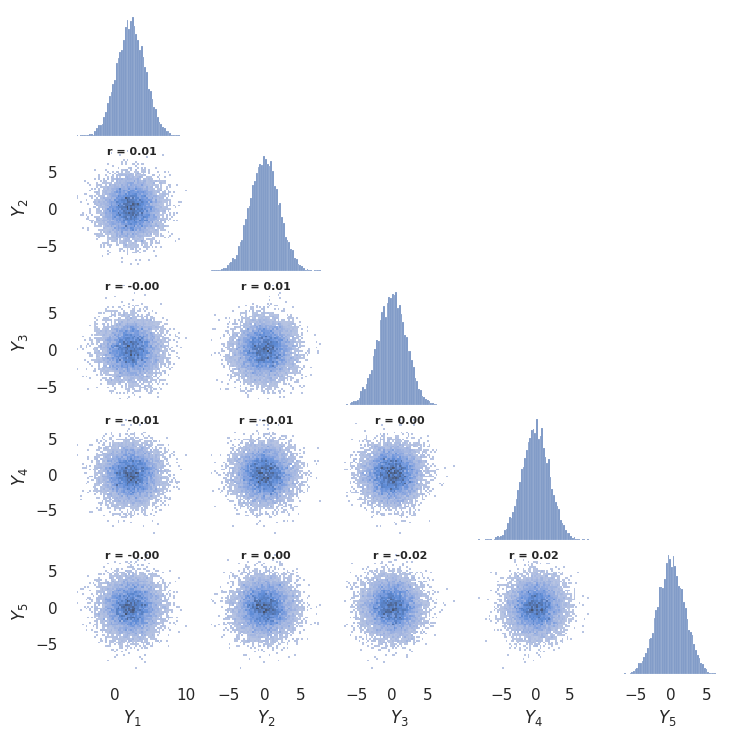

In [10]:
y_df.columns = [f'$Y_{i}$' for i in range(1, n+1)]
# Pairplot
g = sns.pairplot(y_df, corner=True, kind="hist", height=1.5, aspect=1)

# Get variable names (numeric only, in case y_df has non-numeric cols)
vars_list = y_df.select_dtypes(include="number").columns

# Loop over axes for lower triangle (corner=True)
for i, var_row in enumerate(vars_list):
    for j, var_col in enumerate(vars_list):
        ax = g.axes[i, j]
        if ax is not None and i > j:  # lower triangle only
            r = np.corrcoef(y_df[var_row], y_df[var_col])[0, 1]
            # Place text just below top border, centered
            ax.text(
                0.5, 0.98, f"r = {r:.2f}",
                transform=ax.transAxes,
                ha="center", va="top",
                fontsize=8, fontweight="bold"
            )

# remove spines
sns.despine(fig=g.figure, top=True, right=True, left=True, bottom=True)

plt.show()

Additionaly let's compare sample variance computation from `numpy` with our equations:

$$
Q_{original}(x) = \sum_{i=1}^na_{ij}x_ix_j \\
Q_{canonical}(x) = \sum_{i=1}^n\lambda_iy_i^2 \\
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n(x_i - \overline{x})^2 = \frac{1}{n}\cdot Q_{original}(x) = \frac{1}{n}\cdot Q_{canonical}(y)
$$

In [11]:
Q_original = np.einsum('ji,jk,ki->i', X, A, X) # Same as np.diagonal(X.T @ A @ X)
Q_canonical = np.einsum('ij,ij,i->j', Y, Y, eigenvalues) # Same as np.inner(Y.T ** 2, eigenvalues)
variance = np.var(X, axis=0)
print("Difference between Q_original and Q_canonical:")
print(f"sum(Q_original - Q_canonical)^2: {np.sum((Q_original - Q_canonical) ** 2)}")
print(f"sum(Q_original(x) - n * Var(x))^2: {np.sum((Q_original - variance * n) ** 2)}")
print(f"sum(Q_canonical(x) - n * Var(x))^2: {np.sum((Q_canonical - variance * n) ** 2)}")

Difference between Q_original and Q_canonical:
sum(Q_original - Q_canonical)^2: 2.9807538555041936e-25
sum(Q_original(x) - n * Var(x))^2: 1.7719610975009292e-25
sum(Q_canonical(x) - n * Var(x))^2: 1.740339330781233e-25


Finally let's check that sample variance calculation from above results in random variable with $\chi^2(n-1)$ distribution (basically checking if (1) truly stands):

$$
n\frac{\hat{\sigma}^2}{\sigma^2} = \frac{Q_{original}(X)}{\sigma^2} = \frac{Q_{canonical}(Y)}{\sigma^2} \sim \chi^2(n-1)
$$

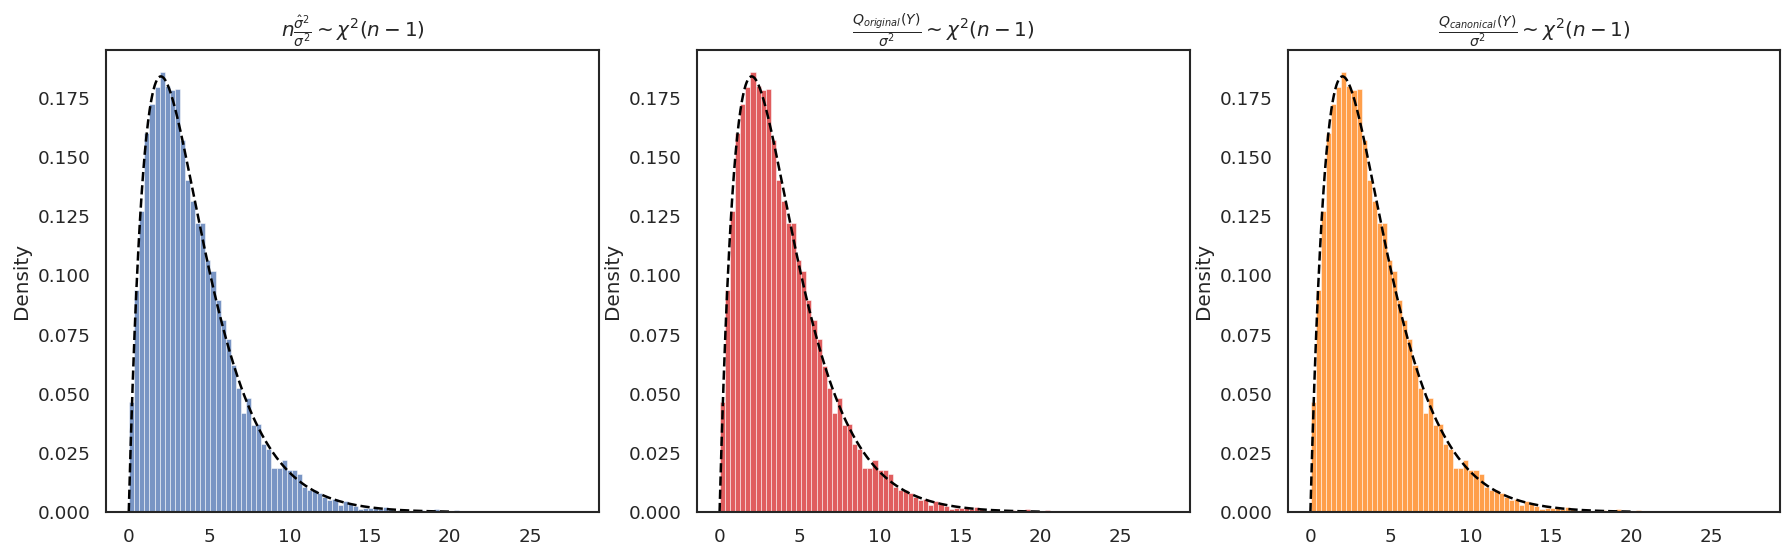

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.2}, dpi=120)

# Calculate pdf for chi2 distribution
t_chi = np.linspace(0, 20, 1000)
chi2_dist = sp.stats.chi2.pdf(t_chi, n - 1)

# Plot sample variance distribution
sns.histplot(n * variance / sigma ** 2, stat='density', ax=ax1)
ax1.plot(t_chi, chi2_dist, linestyle='--', color='black')
ax1.set_title('$n\\frac{\hat{\sigma}^2}{\sigma^2} \sim \chi^2(n - 1)$')

# Plot for Q_original
sns.histplot(Q_original / sigma ** 2, stat='density', ax=ax2, color="tab:red")
ax2.plot(t_chi, chi2_dist, linestyle='--', color='black')
ax2.set_title('$\\frac{Q_{original}(Y)}{\sigma^2} \sim \chi^2(n - 1)$')

# Plot for Q_canonical
sns.histplot(Q_canonical / sigma ** 2, stat='density', ax=ax3, color="tab:orange")
ax3.plot(t_chi, chi2_dist, linestyle='--', color='black')
ax3.set_title('$\\frac{Q_{canonical}(Y)}{\sigma^2} \sim \chi^2(n - 1)$')

plt.show()